In [40]:
import pandas as pd
import numpy as np
from joblib import dump 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'
df = pd.read_csv(file_url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

In [3]:
df_cleaned = df.copy()
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [5]:
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)
X_train_cleaned = X_train.copy()

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cat_cols = ['Gender']

In [22]:
sc = StandardScaler()
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

ohe = OneHotEncoder(sparse=False, drop='first')
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

X_train_cleaned.reset_index(drop=True, inplace=True)

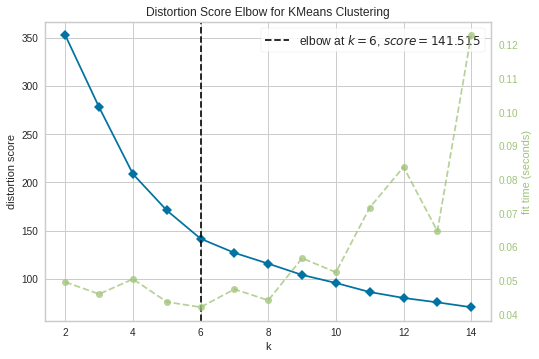

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KElbowVisualizer(KMeans(), k=(2,15))
model.fit(X_train_cleaned)
model.show()

In [36]:
n_clusters = model.elbow_value_

gmm = GaussianMixture(n_components=n_clusters, random_state=8)
gmm.fit(X_train_cleaned)

GaussianMixture(n_components=6, random_state=8)

In [37]:
gmm.predict(X_train_cleaned)

array([2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 4, 4, 2, 4, 5, 2, 2, 5, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2,
       4, 2, 3, 4, 0, 3, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 1, 2, 3,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 4, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 4, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 4,
       0, 2, 2, 3, 5, 2, 2, 2, 3, 3, 4, 4, 2, 0, 2, 2, 2, 1, 1, 2, 4, 1,
       2, 1, 4, 5, 5, 4, 4, 2, 2, 3, 1, 2, 4, 2, 2, 1, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 2, 2])

In [39]:
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()
gmm.predict(obs)

array([2])

In [41]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

In [42]:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

gmm_pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('clustering',
                 GaussianMixture(n_components=6, random_state=8))])

In [43]:
gmm_pipe.predict(X_train)

array([2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 4, 4, 2, 4, 5, 2, 2, 5, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2,
       4, 2, 3, 4, 0, 3, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 1, 2, 3,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 4, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 4, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 4,
       0, 2, 2, 3, 5, 2, 2, 2, 3, 3, 4, 4, 2, 0, 2, 2, 2, 1, 1, 2, 4, 1,
       2, 1, 4, 5, 5, 4, 4, 2, 2, 3, 1, 2, 4, 2, 2, 1, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 2, 2])

In [44]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2])

In [45]:
dump(gmm_pipe,  '../models/gmm_pipeline.joblib')

['../models/gmm_pipeline.joblib']